In [44]:
import matplotlib.pyplot as plt
import math
import numpy
import statistics 

def draw_my_function(f,start,end,number_of_points):
    x_values = numpy.linspace(start,end,number_of_points)
    y_values = f(x_values)
    
    plt.figure(figsize=(15,5))
    plt.plot(x_values,y_values)
    plt.show()
    
def draw_my_function_with_gradient(f,start,end,number_of_points):
    x_values = numpy.linspace(start,end,number_of_points)
    y_values = f(x_values)
    df_dx_values = numpy.gradient(y_values,x_values)
    
    plt.figure(figsize=(15,5)) 
    plt.plot(x_values,y_values)
    plt.plot(x_values,df_dx_values)
    plt.show()
    
f = lambda x_values : numpy.exp(-(x_values/10))*numpy.sin(x_values)

## Question 1)

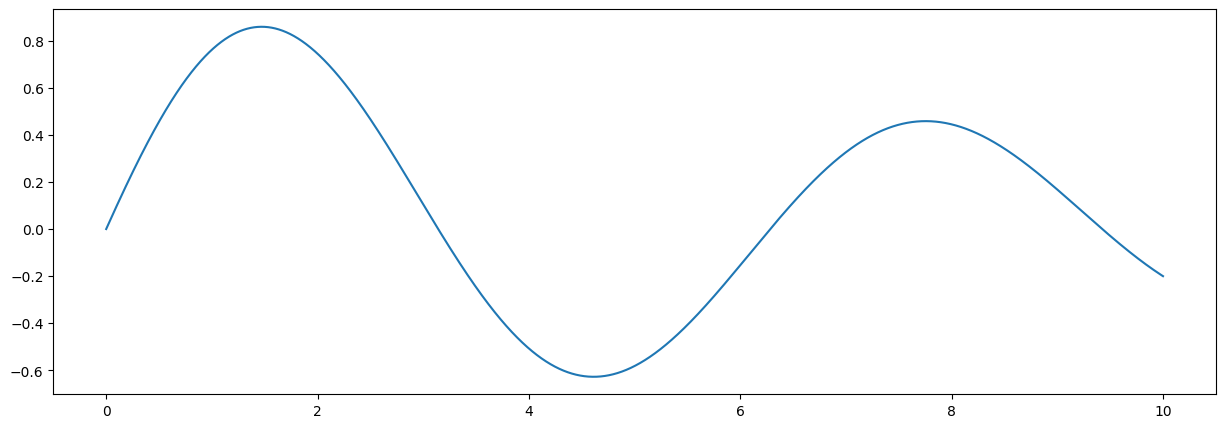

In [45]:
start,end=0,10
number_of_points = 10000

draw_my_function(f,start,end,number_of_points)


    


## Question 2)

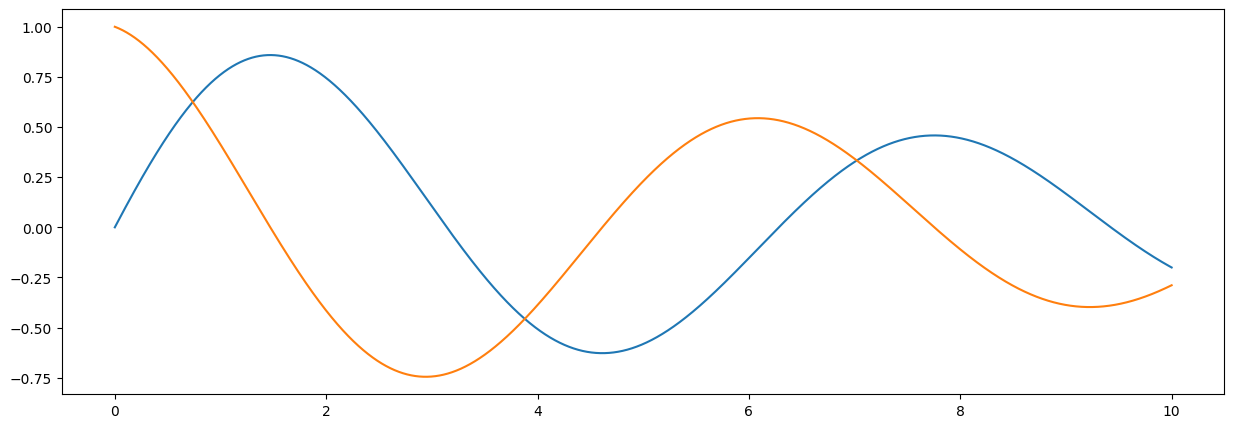

In [46]:
start,end=0,10
number_of_points = 10000

draw_my_function_with_gradient(f,start,end,number_of_points)

## Question 3)

La moyenne de la fonction f(x) sur l'intervale [3,7] est   : -0.2795672812096891
La variance de la fonction f(x) sur l'intervale [3,7]est   : 0.07890255734732118
L'écart type de la fonction f(x) sur l'intervale [3,7]est : 0.2808959902656519


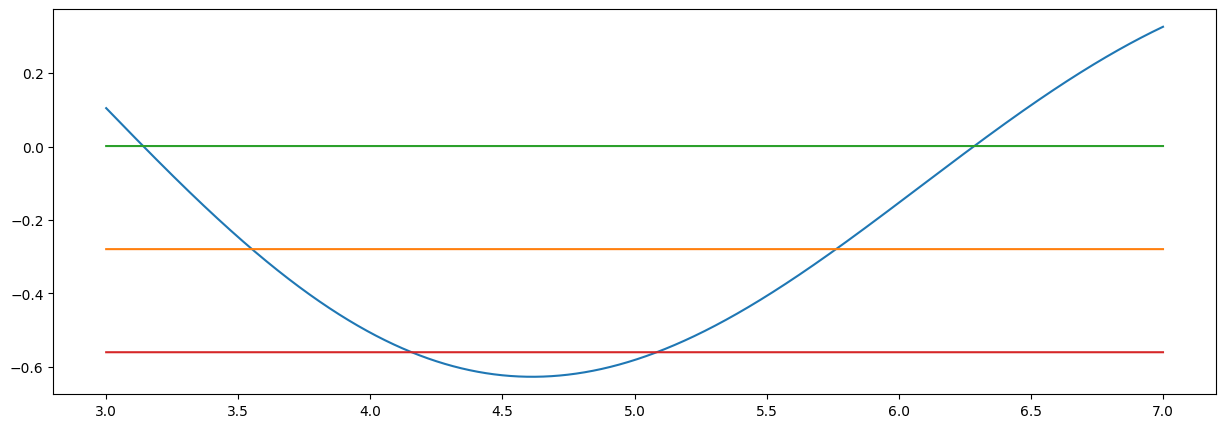

In [138]:
start,end=0,10
number_of_points = 10000
steps = (end-start)/number_of_points
variance = 0

x_values_10 = []
y_values_10 = []

for index_step in range (0,number_of_points):
    x_values_10.append(start+index_step*steps)
    y_values_10.append(f(start+index_step*steps))


#slicing sur l'intervalle [3,7]   
index_a = x_values_10.index(3)
index_b = x_values_10.index(7)+1
x_values = x_values_10[index_a:index_b]
y_values = y_values_10[index_a:index_b] 

# calcul de la moyenne et de sa droite
mean = sum(y_values)/len(y_values)
ligne_mean = [mean]*len(y_values)

# calcul de la variance
for i in range(0,len(y_values)):
    variance = variance + (f(i)-mean)**2
variance = variance/len(y_values)

# calcul de l'ecart type et de ses droites
ecart_type = math.sqrt(variance)
ecart_type_top = [mean + ecart_type]*len(x_values)
ecart_type_bot = [mean - ecart_type]*len(x_values)

print("La moyenne de la fonction f(x) sur l'intervale [3,7] est   :",mean)
print("La variance de la fonction f(x) sur l'intervale [3,7]est   :",variance)
print("L'écart type de la fonction f(x) sur l'intervale [3,7]est :",ecart_type)

plt.figure(figsize=(15,5)) 
plt.plot(x_values,y_values)
plt.plot(x_values,ligne_mean)
plt.plot(x_values,ecart_type_top)
plt.plot(x_values,ecart_type_bot)
plt.show()

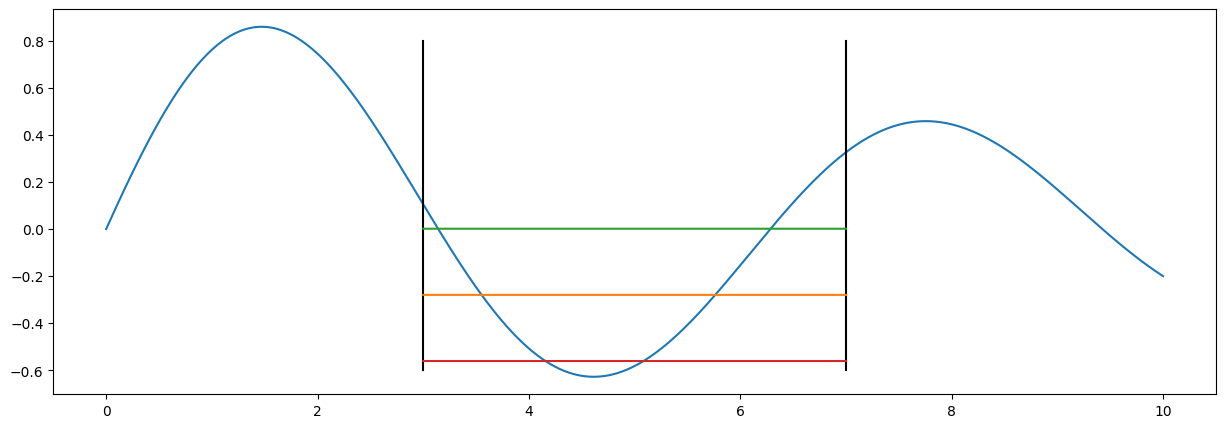

In [137]:
plt.figure(figsize=(15,5)) 
plt.plot(x_values_10,y_values_10)
plt.plot([3,3],[-0.6,0.8],"k")
plt.plot([7,7],[-0.6,0.8],"k")
plt.plot(x_values,ligne_mean)
plt.plot(x_values,ecart_type_top)
plt.plot(x_values,ecart_type_bot)
plt.show()